Install libraries

In [28]:
%pip install tensorflow
# deep learning library used to creat sequential models

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pandas
# read data in tabular format since it is in excel or csv format

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install matplotlib
#help with plotting

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install scikit-learn
#used basically for matrix

Defaulting to user installation because normal site-packages is not writeable


Import requierd libraries

In [2]:
import os #help to work with different file paths or navigate through different file paths
import pandas as pd
import tensorflow as tf
import numpy as np

Bring in our data

In [3]:
df = pd.read_csv(  # used to read in our csv
    os.path.join(r'C:\Users\FALGUNI\OneDrive\Documents\Hate comment detection\jigsaw-toxic-comment-classification-challenge\train.csv.zip'))
    #pass the path of the training data we are going to use


In [4]:
df.head()
#to read data from start of our file 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.tail()
#to read data from the end of our file

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
df.iloc[6]['comment_text']
#to read particular comment

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [7]:
df[df.columns[2:]].iloc[6]
# to look at perticular comment attribute values

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

Preprocessing of the data

Tokenizing the data --> translating the sentences into our own secret language that only deep learning network understand
i.e. convert each word in the sentence into a unique identifier so that each word maps to a number

In [8]:
from tensorflow.keras.layers  import TextVectorization
# using tectvectorization to tokenize our text

split the data into comments and features

In [9]:
x = df['comment_text']
y = df[df.columns[2:]].values
#  we can customize our output as we need to display only the index values use df.columns this will list all columns of table. If we need all values for particular column then type df['comment_text'] this will give us all the comments

#to get all columns from 2nd and use .values to represent in the form of an array. .values will give us the format which we can pass to out tenserflow deep learning model.

#so under X we have all our bad comments and under Y we have all our labels


In [10]:
df[df.columns[2:]].values
#printing all columns that conatain label.

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [11]:
MAX_FEATURES = 200000
# this will specify the number of words in the vocalobary our dictnary will have i.e. how many words will be stored in dict. in the form of textvectorization.

initialize textvectorization layer

In [12]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES, #max words in out vocab should be this 
                               output_sequence_length = 1800, #maximum length of the sentence in the token
                               output_mode = 'int') 

teach our vectorizer our vocab i.e. train the model with our vocab

In [13]:
vectorizer.adapt(x.values)
#adapt will learn all our words inside our vocablory

In [14]:
#to see the effect of vectorizer we can simply try this out
vectorizer('Hello world, life is great')[:5]
#this will give us the values for each word of the above sentence in the form of array, so 288 is Hello and so on.

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275], dtype=int64)>

do above effect for all comments rather than just above sentence

In [15]:
vectorizer.get_vocabulary()
vectorized_text = vectorizer(x.values)

In [16]:
#hence after above vectorization our data now looks like this
#so we have total 159571 samples and 1800 words are tokenized as we mentioned before in limit 
#also we can observe in the output that if perticular sentence does not meet the limit here 1800 words then it will just fill 0's in place of it.
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

create our dataset 

In [17]:
#create tensorflow data pipeline--> this will make it easy to train deep learning model and is mainly used for the data which cannot fit into the memory 

#MCSHBAP - map, chache, shuffel, batch, prefetch

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y)) #create a dataset, we pass our data we created above and  also the vectorized text
dataset = dataset.cache() #caches our data 
dataset = dataset.shuffle(160000) #pass the argument as how large should be the buffer size
dataset = dataset.batch(16) #each batch is represented as series of 16 samples 
dataset = dataset.prefetch(8) #help prevents bottlenecks

grab data from dataset 

In [18]:
dataset.as_numpy_iterator().next()
#this will represent our comment/text/sentences in vectorized format with all the labels 

(array([[ 123,   61,   20, ...,    0,    0,    0],
        [ 283, 2221,  693, ...,    0,    0,    0],
        [ 339,    7, 1620, ...,    0,    0,    0],
        ...,
        [ 202,   55, 1806, ...,    0,    0,    0],
        [  46,  168,   21, ...,    0,    0,    0],
        [ 192, 5176,   11, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [19]:
#unpack above data as 
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [20]:
#vectorized text examples -->we can see we have 16 samples and maxed as 1800 words each 
batch_x.shape

(16, 1800)

In [21]:
#labels --> 16 samples represented by 6 values in the vector
batch_y.shape

(16, 6)

create our training validation and test partetation 

In [22]:
train = dataset.take(int(len(dataset)*.7)) #take 70% of the length of our dataset i.e. assign 70% of the data to training partetion.
# len(dataset) will print the length of data(it will be in batches since we converted before). 
# len(dataset)*.7 will give 70% of that data. 
#int(len(dataset)*.7) will convert it into integer
#dataset.take will take this pertationed data out and assign it to variable train
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
#.skip specifies that skip 70% of the data i.e. used in train and then take another 20% as our validation partation
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))
#here skip 70+20 = 90% of the data and remaining 1% used as testing data 

In [23]:
train.as_numpy_iterator().next()
#take the batch out of data as dataset name (train here).as_numpy_iterator which will create a generator and .next will get us the next batch 

(array([[   433,      8,    152, ...,      0,      0,      0],
        [    14,      9,     15, ...,      0,      0,      0],
        [ 82640,    142, 145737, ...,      0,      0,      0],
        ...,
        [  4596,     73,     76, ...,      0,      0,      0],
        [     5,      6,    860, ...,      0,      0,      0],
        [    49,    124,      7, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

Embedding the tokens.
It's like a personality test for a word. It tells us all about that word which will make it very useful for deep learnning

1st step is to create sequential model

In [24]:
from tensorflow.keras.models import Sequential
#first import the sequential APIs since it is fastest and easiest of all other methods
from tensorflow.keras.layers import Input, LSTM, Dropout, Bidirectional, Dense, Embedding
#import the layers which we will use to build on our deep neuron network
#first layer will be lstm layer and bi-directional will be a modifier on top of it and will allow us to pass the features/values from lstm output across the board as we pass through the sequences 
#dropout is method of regularization and dense layer is our fully connected layer 

In [25]:
# Define the input shape
INPUT_LENGTH =  None
input_layer = Input(shape=(INPUT_LENGTH ,))

model = Sequential() #this will instantiate the sequrntial APIs and then we can add in the number of layers we need to build it up

# Add the Input layer
model.add(input_layer)

#create the embedding layer, embedding is represented as number of words+1  +1 for unknow word. Our embedding will be 32 in length. i.e 32 features in the embedding for each word 
model.add(Embedding(MAX_FEATURES+1, 32))
#create LSTM layer which will have 32 different lstm units and specify that they have activation of tan-h 
model.add(Bidirectional(LSTM(32, activation='tanh')))

#3 layers for feature extraction
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

#final layers that will map to different output we got inside our neural network
model.add(Dense(6, activation = 'sigmoid'))


In [26]:
y[0]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 32)       │     6,400,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,491,686 (24.76 MB)

 Trainable params: 6,491,686 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

create the training set 

In [31]:
history = model.fit(train, epochs=1, validation_data=val)
#for training we run this .fit and pass training data, how long we want to train it or how many passes we are going to do for our training data and also pass validation data 

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5327s 763ms/step - loss: 0.0675 - val_loss: 0.0448


In [32]:
history.history

{'loss': [0.05829273909330368], 'val_loss': [0.04476885125041008]}

In [34]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

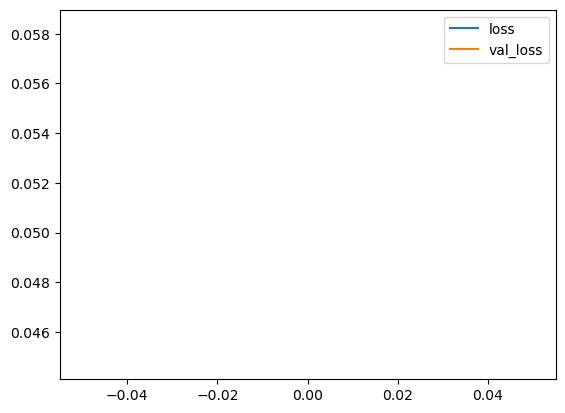

In [35]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

Make predictions

In [40]:
input_text = vectorizer('You freaking suck!')
#use vectorizer and pass the text we want to vectorize 
#input text will be a sequence of integers which will be 1800 value long and if it does not meet with this length it will pad the results with 0

now when we pass this to .predict as model.predict(input_text) then it will not work since we have not passed the input as a batch or series of values. 

since the model will expect the output to be like 
none x no. of val in our sequence x length of embedding/ input shape 

In [42]:
#create a batch variable to pass input in batch
batch = test.as_numpy_iterator().next()

In [ ]:
#get data out on data pipeline
batch_x, batch_y =  test.as_numpy_iterator().next()

In [53]:
model.predict(batch_y)
#here we can see all our comments are predicted.
# to see only the ones with value 1 we can do 
(model.predict(batch_y) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [41]:
#hence we pass it on custom dataset as 
model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


array([[0.9794107 , 0.32465982, 0.91114676, 0.05329124, 0.7483285 ,
        0.17601235]], dtype=float32)

In [ ]:
res = model.predict(np.expand_dims(input_text,0))
# res will store our result and .predict will be used to make prediction

evaluating the model

In [46]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [47]:
#instiantiate precision matrix, recall and categorical accuracy 
pre = Precision() 
re = Recall()
acc = CategoricalAccuracy()

In [48]:
#making these predictions 

#loop through every single batch inside out data pipeline
for batch in test.as_numpy_iterator():
    #unpack the batch/values
    x_true, y_true = batch

    #make predictin and pass our comments x_true which are already tokenize 
    yhat = model.predict(x_true)

    #flatten the prediction so that it become one big vector 
    y_true= y_true.flatten()
    yhat = yhat.flatten()

    #update the metrices based on current state of data
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [55]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 0.8283185958862305, Recall: 0.6543624401092529,Accuracy:0.47342026233673096


build the gradio app

In [56]:
%pip install gradio jinja2

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.6 MB 3.2 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/12.6 MB 3.7 MB/s eta 0:00:03
   --------- ------------------------------ 2.9/12.6 MB 3.7 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.6 MB 3.9 MB/s eta 0:00:03
   --------------- ------------------------ 4.7/12.6 MB 3.9 MB/s eta 0:00:03
   ------------------ --------------------- 5.8/12.6 MB 4.0 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.6 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 7.3/12.6 MB 4.0 MB/s eta 0:00:02
   ------------------------- -------------- 8.1/12.6 MB 3.9 MB/s eta 0:00:02
   ---------------------------- ----------- 8.9/12.6 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.6 MB 3.9 MB/s eta 0:00:01
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.8.2 which is incompatible.


In [57]:
import gradio as gr

In [58]:
model.save('Toxic_Comments.h5')
#save the model in a file names Toxic_Comments in h5 format

In [60]:
model = tf.keras.models.load_model('Toxic_Comments.h5')
# load our model as backup 

In [65]:
input_str = vectorizer('hey I frekin hate you! I am coming for you and I will hurt you')

In [66]:
res = model.predict(np.expand_dims( input_str, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [67]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [68]:
res

array([[0.42678466, 0.00771136, 0.10149515, 0.01820909, 0.17861527,
        0.03886772]], dtype=float32)

In [70]:
#implement a function that we will hook into our gradio model

def score_comment(comment):
    #pass the comment  through vectorizer so that it convert it into series of numbers
    vectorized_comment = vectorizer([comment])
    #run comments through our model
    results = model.predict(vectorized_comment)

    #unpack all our results 
    #this loop will go through each of our columns toxic, obscence etc one by one and result will be printed
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)
    
    return text

In [74]:
interface = gr.Interface(fn = score_comment, #pass the function we want to run when we hit enter 
                         inputs = gr.Textbox(lines=2, placeholder = 'comment to score'), #input will be textbox 
                         outputs = 'text') #output will be set of text 

In [75]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
